# House Price Study Notebook

## Objectives

*   Answer business requirement 1: 
    * The client is interested in discovering how house attributes correlate with sale prices. Therefore, the client expects data visualizations of the correlated variables against the sale price.

## Inputs

* outputs/datasets/collection/house_prices_records.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App






---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir


'/workspaces/heritage-housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing'

---

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_prices_records.csv"))
df


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854,3,No,706,GLQ,150,0,548,RFn,...,65,196,61,5,7,856,0,2003,2003,208500
1,1262,0,3,Gd,978,ALQ,284,0,460,RFn,...,80,0,0,8,6,1262,0,1976,1976,181500
2,920,866,3,Mn,486,GLQ,434,0,608,RFn,...,68,162,42,5,7,920,0,2001,2002,223500
3,961,0,0,No,216,ALQ,540,0,642,Unf,...,60,0,35,5,7,756,0,1915,1970,140000
4,1145,0,4,Av,655,GLQ,490,0,836,RFn,...,84,350,84,5,8,1145,0,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,3,No,0,Unf,953,0,460,RFn,...,62,0,40,5,6,953,0,1999,2000,175000
1456,2073,0,0,No,790,ALQ,589,0,500,Unf,...,85,119,0,6,6,1542,0,1978,1988,210000
1457,1188,1152,4,No,275,GLQ,877,0,252,RFn,...,66,0,60,9,7,1152,0,1941,2006,266500
1458,1078,0,2,Mn,49,None,0,112,240,Unf,...,68,0,0,6,5,1078,0,1950,1996,142125


# Data Exploration

In [6]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation Study

We encode the categorical columns into numerical, to make further studies easier.

In [5]:
# Define the mapping for categorical columns
cat_mappings = {
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
}

# Apply mappings to the categorical columns
for column, mapping in cat_mappings.items():
    df[column] = df[column].map(mapping)


Inspect the DataFrame, all values are now integers:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   1stFlrSF       1460 non-null   int64
 1   2ndFlrSF       1460 non-null   int64
 2   BedroomAbvGr   1460 non-null   int64
 3   BsmtExposure   1460 non-null   int64
 4   BsmtFinSF1     1460 non-null   int64
 5   BsmtFinType1   1460 non-null   int64
 6   BsmtUnfSF      1460 non-null   int64
 7   EnclosedPorch  1460 non-null   int64
 8   GarageArea     1460 non-null   int64
 9   GarageFinish   1460 non-null   int64
 10  GarageYrBlt    1460 non-null   int64
 11  GrLivArea      1460 non-null   int64
 12  KitchenQual    1460 non-null   int64
 13  LotArea        1460 non-null   int64
 14  LotFrontage    1460 non-null   int64
 15  MasVnrArea     1460 non-null   int64
 16  OpenPorchSF    1460 non-null   int64
 17  OverallCond    1460 non-null   int64
 18  OverallQual    1460 non-null   int64
 19  TotalB

## Study 1 - top five features

Investigate correlation using Spearman and Pearson method.
Code borrowed from CI walkthrough project.

In [7]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
KitchenQual     0.672849
YearBuilt       0.652682
GarageArea      0.649379
GarageYrBlt     0.634095
TotalBsmtSF     0.602725
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
Name: SalePrice, dtype: float64

In [8]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
GarageFinish    0.404100
Name: SalePrice, dtype: float64

We plot the distribution on a heatmap to visualize the correlation.

In [13]:
%matplotlib inline

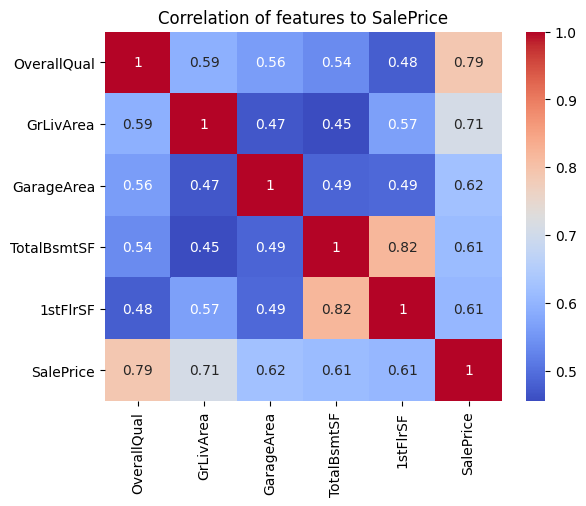

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 5 variables with highest correlation with SalePrice
corr = df.corr()
top_corr_features = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'SalePrice']

# Plot heat map
sns.heatmap(df_ohe[top_corr_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of features to SalePrice")
plt.show()


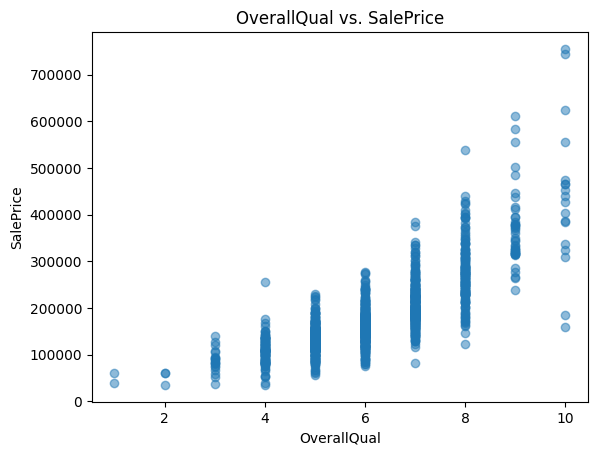

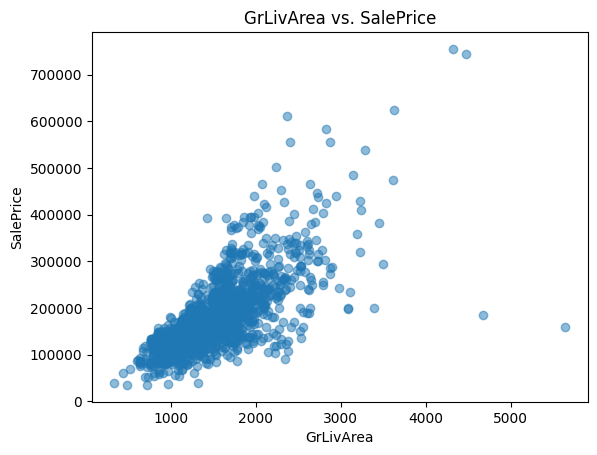

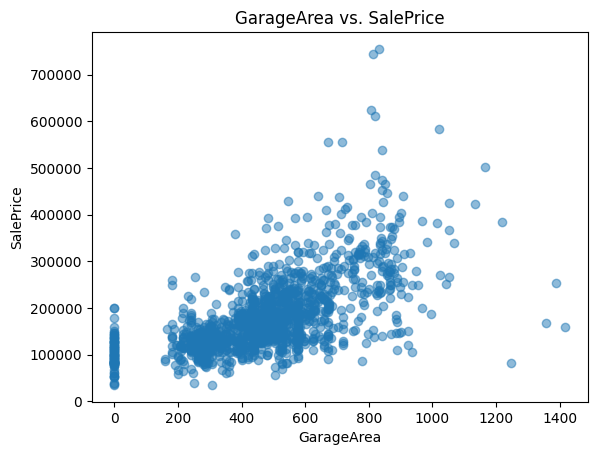

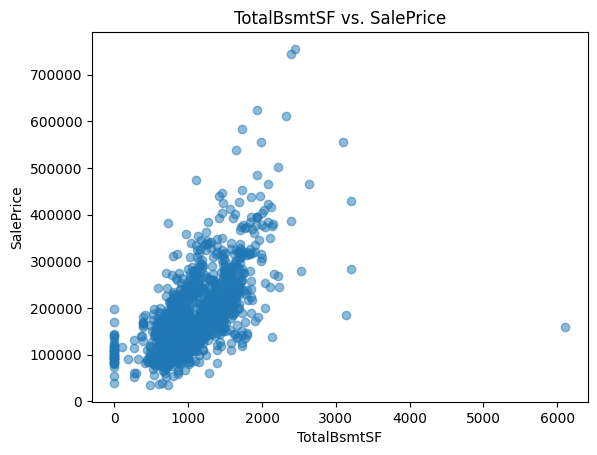

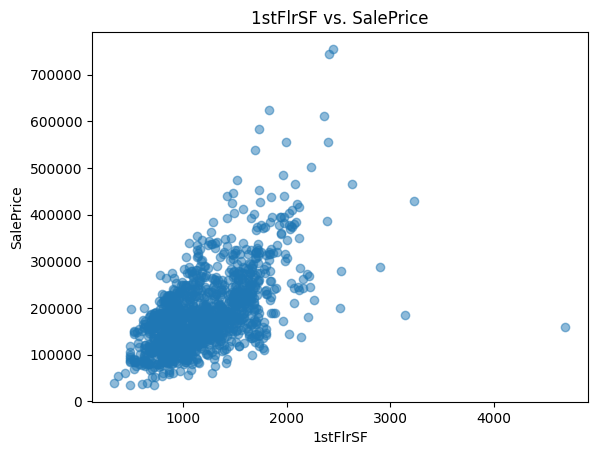

In [47]:
import matplotlib.pyplot as plt

# select the top 5 variables that are most strongly correlated with SalePrice
top_5_vars = df_ohe[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']]

# create scatterplots showing the relationship between each variable and SalePrice
for var in top_5_vars:
    plt.figure()
    plt.scatter(df[var], df['SalePrice'], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.title(f'{var} vs. SalePrice')
    plt.show()


## Study 2 - excluding Square Footage and Overall Quality features

The study shows that the size and quality features of the house are the most important variables for the price, which is to be expected.
We perform a second study which excludes the size and overall quality should be performed, to see if there are any other important correlations.

In [7]:
features_excl_qual_ft = df_ohe[['BedroomAbvGr', 'EnclosedPorch', 'GarageYrBlt', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtExposure_No', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_Av', 'BsmtExposure_None', 'BsmtFinType1_GLQ', 'BsmtFinType1_ALQ', 'BsmtFinType1_Unf', 'BsmtFinType1_Rec', 'BsmtFinType1_BLQ', 'BsmtFinType1_None', 'BsmtFinType1_LwQ', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageFinish_Fin', 'GarageFinish_None', 'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Ex', 'KitchenQual_Fa', 'SalePrice']]

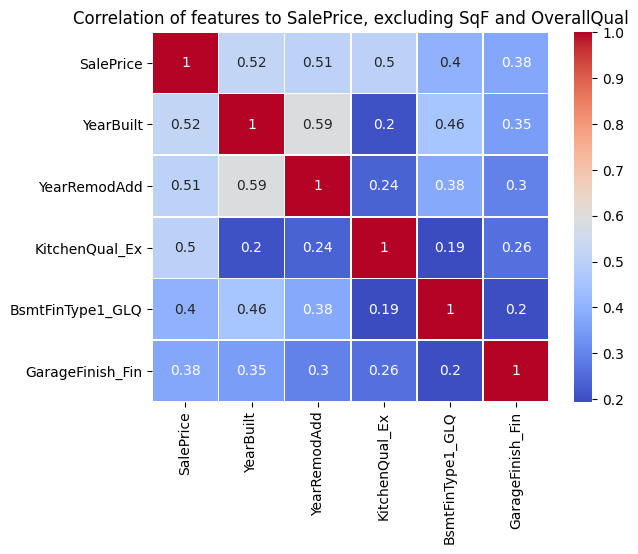

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = features_excl_qual_ft.corr()

# Sort the correlation values with respect to SalePrice
corr_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)

# Select the top 5 features
top_features = corr_saleprice.index[:6]

# Create a subset DataFrame with the top features
subset_top_features = df_ohe[top_features]

# Create a correlation matrix for the top features
corr_subset = subset_top_features.corr()

# Plot the correlation matrix as a heatmap
plt.figure()
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of features to SalePrice, excluding SqF and OverallQual')
plt.show()


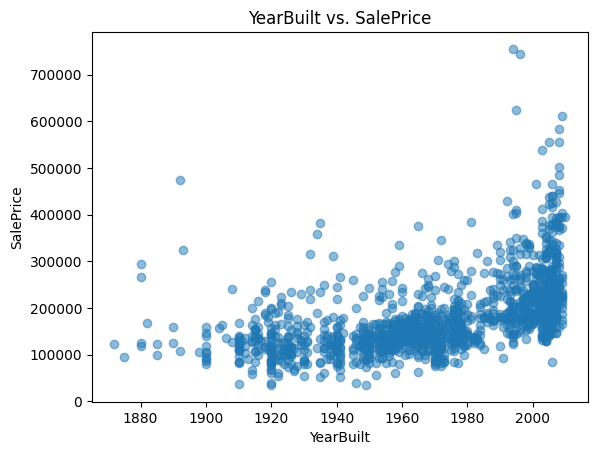

In [51]:
    plt.figure()
    plt.scatter(df_ohe['YearBuilt'], df['SalePrice'], alpha=0.5)
    plt.xlabel('YearBuilt')
    plt.ylabel('SalePrice')
    plt.title('YearBuilt vs. SalePrice')
    plt.show()

----

# Conclusions and Next steps

* Overall Quality seems to increase the price significantly
* The size of the ground floor and garage area also seems to have a high impact
* Newness of the house also seems to raise the price

Next step is to display these plots on the dashboard in order to answer Business Requirement #1